Skoro interesuje nas **wartość** gradientu, to może wykorzystajmy definicję pochodnej:

![derivative-limit](https://wikimedia.org/api/rest_v1/media/math/render/svg/28c61f16be60a66e84a24082529dee3c47a174b7)

In [1]:
function g(x, y)
    r = 1.0
    for i=1:y
        r *= x
    end
    return r
end

forward_diff(f, x₀; Δx=1e-3) = ( f(x₀ + Δx) - f(x₀) )/Δx

Δx = 1e-9
x₀ = 5.
y₀ = 3

f(x) = g(x, y₀)
dgdx = forward_diff(f, x₀; Δx=Δx)

75.00000265281415

W rzeczywistości `g(x, y)` oblicza wartość `x^y`, więc jego pochodna dana jest wzorem:

In [2]:
dg(x, y) = y*x^(y-1)
dg(x₀,y₀)

75.0

Zmniejszając krok $\Delta x$ teoretycznie powinniśmy dostać idealne rozwiązanie, jednak wcale tak nie będzie:

In [3]:
Δx = 10.0.^(-15.:0.1:0.);
Eforward  = similar(Δx)
for i=1:length(Δx)
    Eforward[i] = forward_diff(f, x₀; Δx=Δx[i]) - dg(x₀, y₀);
end

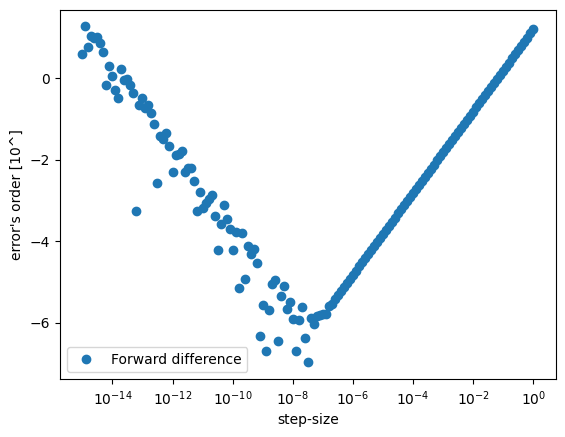

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/bach/.julia/packages/PyPlot/XaELc/src/init.jl:198
┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/bach/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


PyObject Text(24.000000000000007, 0.5, "error's order [10^]")

In [4]:
using PyPlot
semilogx(Δx, log10.(abs.(Eforward)), "o")
legend(("Forward difference", "Central difference", "Complex difference"))
xlabel("step-size")
ylabel("error's order [10^]")

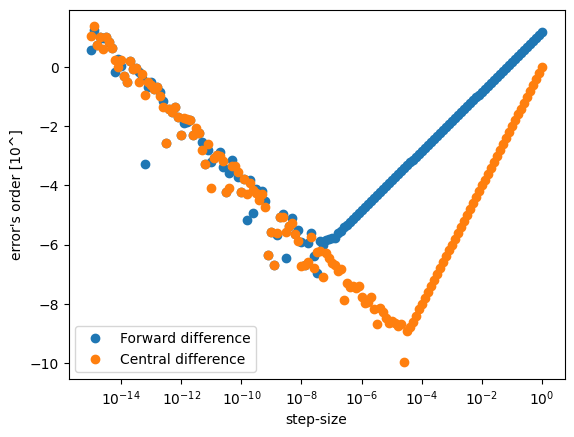

PyObject Text(24.000000000000007, 0.5, "error's order [10^]")

In [5]:
center_diff(f, x₀; Δx=1e-3) = ( f(x₀ + Δx) - f(x₀ - Δx) )/2Δx
Ecenter = similar(Δx)
for i=1:length(Δx)
    Ecenter[i]  = center_diff(f, x₀; Δx=Δx[i]) - dg(x₀, y₀);
end
using PyPlot
semilogx(Δx, log10.(abs.(Eforward)), "o")
semilogx(Δx, log10.(abs.(Ecenter)), "o")
legend(("Forward difference", "Central difference", "Complex difference"))
xlabel("step-size")
ylabel("error's order [10^]")

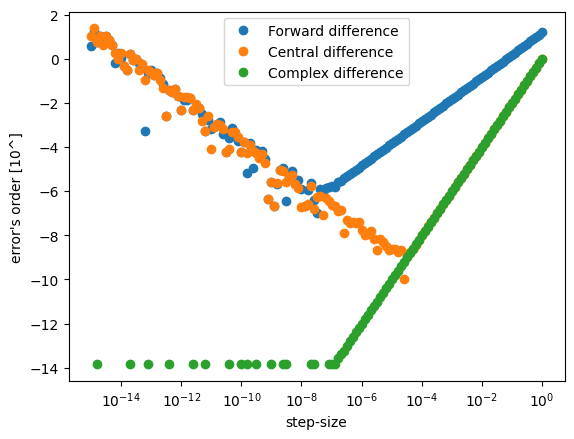

PyObject Text(24.000000000000007, 0.5, "error's order [10^]")

In [6]:
complex_diff(f, x₀; Δx=1e-3) = imag(f(x₀ + Δx*1im))/Δx
Ecomplex = similar(Δx)
for i=1:length(Δx)
    Ecomplex[i]  = complex_diff(f, x₀; Δx=Δx[i]) - dg(x₀, y₀);
end
using PyPlot
semilogx( Δx, log10.(abs.(Eforward)), "o")
semilogx(Δx, log10.(abs.(Ecenter)), "o")
semilogx(Δx, log10.(abs.(Ecomplex)), "o")
legend(("Forward difference", "Central difference", "Complex difference"))
xlabel("step-size")
ylabel("error's order [10^]")